<a href="https://colab.research.google.com/github/sseydaltin/makine/blob/main/denetimli_ogrenme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. **Denetimli Öğrenme Nedir?**
   - **Basit Tanım:** Denetimli öğrenme, bilgisayara bir dizi giriş (X) ve bu girişlere karşılık gelen doğru cevaplar (etiketler, Y) vererek bir model oluşturma sürecidir.
---

### 2. **Önemli Kavramlar**
   - **Giriş ve Çıkış:**
     - Giriş (X): Örneğin bir evin özellikleri (metrekare, oda sayısı).
     - Çıkış (Y): Evin fiyatı.
   - **Veri Seti:**
     - Eğitim veri seti: Modelin öğrendiği veri.
     - Test veri seti: Modelin doğruluğunu test ettiğimiz veri.
   - **Hedef:** Doğru tahminler yapabilen bir model oluşturmak.

---

### 3. **Denetimli Öğrenme Türleri**
   - **Regresyon:**
     - Sürekli değerler tahmin edilir.
     - Örnek: Bir evin fiyatını tahmin etme.
   - **Sınıflandırma:**
     - Kategorik sonuçlar tahmin edilir.
     - Örnek: Bir e-posta spam mi, değil mi?

---

### 4. **Denetimli Öğrenme Süreci**
   1. **Veri Toplama:** Çözmek istediğiniz problem için veri toplanır.
   2. **Veri Önişleme:** Eksik verilerin tamamlanması, normalizasyon, vb.
   3. **Model Seçimi:** Regresyon mu, sınıflandırma mı?
   4. **Model Eğitimi:** Eğitim verisi ile model oluşturulur.
   5. **Model Değerlendirme:** Test verisiyle doğruluk kontrolü yapılır.
   6. **Tahmin:** Yeni verilere dayanarak tahmin yapılır.

---

### 5. **Özet**
   - Denetimli öğrenme, etiketli veri ile yapılan bir öğrenme türüdür.
   - Regresyon ve sınıflandırma iki temel türüdür.
   - Veri hazırlığından model değerlendirmesine kadar bir dizi adımdan oluşur.

---


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# REGRESYON PROBLEMLERİ

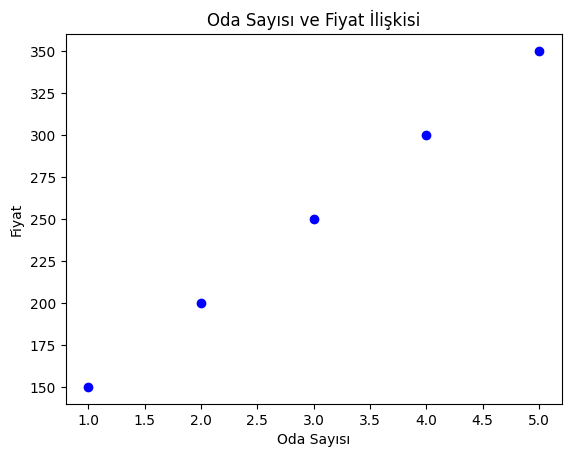

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Veri seti
x = np.array([1, 2, 3, 4, 5])  # Odalar
y = np.array([150, 200, 250, 300, 350])  # Fiyatlar

plt.scatter(x, y, color='blue')
plt.title("Oda Sayısı ve Fiyat İlişkisi")
plt.xlabel("Oda Sayısı")
plt.ylabel("Fiyat")
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression

# Model oluşturma
x = x.reshape(-1, 1)  # Scikit-learn için veri şekillendirme
model = LinearRegression()
model.fit(x, y)

# Model katsayıları
print("Doğru Katsayısı (w):", model.coef_)
print("Kesim Noktası (b):", model.intercept_)


Doğru Katsayısı (w): [50.]
Kesim Noktası (b): 100.0


**y=w⋅x+b**

* w =  50 (doğru katsayısı/eğim)
* 𝑏 = 100 (kesim noktası)

* y=50⋅x+100

Elimizdeki
* 𝑥 = Oda Sayısı
* y=Fiyat olarak düşünelim

In [ ]:
# Yeni veri ile tahmin
new_rooms = np.array([[6], [7]])
predictions = model.predict(new_rooms)
print("Tahminler:", predictions)


Tahminler: [400. 450.]


* 400: Model, 6 odalı bir evin fiyatını 400 birim olarak tahmin ediyor.
* 450: Model, 7 odalı bir evin fiyatını 450 birim olarak tahmin ediyor.

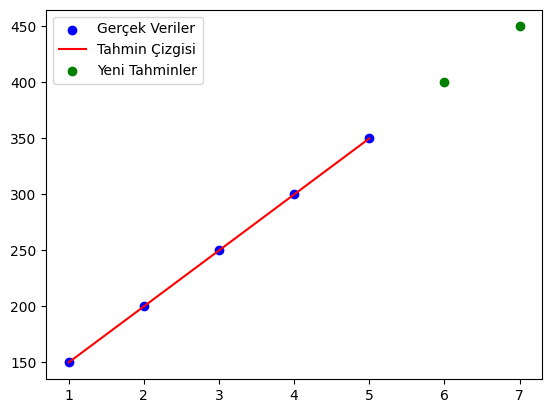

In [ ]:
plt.scatter(x, y, color='blue', label="Gerçek Veriler")
plt.plot(x, model.predict(x), color='red', label="Tahmin Çizgisi")
plt.scatter(new_rooms, predictions, color='green', label="Yeni Tahminler")
plt.legend()
plt.show()


**Hata=Gerçek Değerler - Tahmin Edilen Değerler**


# SINIFLANDIRMA PROBLEMLERİ

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Orijinal Veri
data = {
    "Renk": ["Kırmızı", "Sarı", "Kırmızı", "Yeşil", "Sarı"],
    "Ağırlık": [150, 200, 170, 120, 180],
    "Tür": ["Elma", "Muz", "Elma", "Armut", "Muz"]
}
df = pd.DataFrame(data)

In [ ]:
# LabelEncoder Nesnelerini Oluşturma ve Fit Etme
renk_encoder = LabelEncoder()
tur_encoder = LabelEncoder()

df["Renk"] = renk_encoder.fit_transform(df["Renk"])
df["Tür"] = tur_encoder.fit_transform(df["Tür"])

X = df[["Renk", "Ağırlık"]]
y = df["Tür"]

# Eğitim ve Test Verisi Ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
from sklearn.exceptions import ConvergenceWarning

# Uyarıları bastırma
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Model eğitimi
model = LogisticRegression()
model.fit(X_train, y_train)

# Tahmin yapma
y_pred = model.predict(X_test)
print("Doğruluk Skoru:", accuracy_score(y_test, y_pred))


# Model Eğitimi
model = LogisticRegression()
model.fit(X_train, y_train)




Doğruluk Skoru: 1.0


LogisticRegression()

In [ ]:
new_data = pd.DataFrame({"Renk": [1, 0], "Ağırlık": [160, 190]})
predictions = model.predict(new_data)
print("Yeni Tahminler:", predictions)


Yeni Tahminler: [1 2]


Sınıflandırma problemindeki kod çıktısında **"Yeni Tahminler: [1 2]"**, modelin yeni verilen girişlere karşılık gelen **sınıf etiketlerini** (kategorileri) tahmin ettiğini ifade eder.

---

### **Açıklama**
Model, veri setindeki **Tür** sütununa göre sınıflandırma yapıyor. Veri setinde, **Tür** sütununun etiketleri `LabelEncoder` ile sayısal değerlere dönüştürülmüştü:

| Tür (Orijinal) | Tür (Encoded) |
|----------------|---------------|
| Elma          | 0             |
| Muz           | 1             |
| Armut         | 2             |

- **[1, 2]** tahminleri, modelin yeni girişler için sırasıyla:
  - İlk örneği **"Muz" (1)**,
  - İkinci örneği **"Armut" (2)** olarak sınıflandırdığını gösterir.

---

### **Nasıl Hesaplandı?**
Model, yeni verilere (örneğin, renk ve ağırlık bilgisi) bakarak hangi sınıfa ait olduğunu belirledi:

```python
new_data = pd.DataFrame({"Renk": [1, 0], "Ağırlık": [160, 190]})
predictions = model.predict(new_data)
print("Yeni Tahminler:", predictions)
```

Bu kodun girdilerindeki:
- `Renk`: 1 ve 0 (örneğin, sarı ve kırmızı renkler)
- `Ağırlık`: 160 gram ve 190 gram gibi ağırlıklar

Verildiğinde model, bu özelliklere en uygun sınıfı tahmin etti:
- **160 gram ve sarı renk** -> Muz (etiket 1)
- **190 gram ve kırmızı renk** -> Armut (etiket 2)

---

### **Sonuç:**
Modelin tahmin ettiği sınıflar:
- **1:** Yeni örneğin sınıfı "Muz".
- **2:** Yeni örneğin sınıfı "Armut".

Eğer orijinal sınıf adlarını görmek istiyorsanız, `LabelEncoder`'ın `inverse_transform` yöntemini kullanarak sayısal tahminleri orijinal sınıf adlarına çevirebilirsiniz:

```python
# Tahminleri orijinal etiketlere dönüştürme
decoded_predictions = LabelEncoder().inverse_transform(predictions)
print("Tahminler (Orijinal Etiketler):", decoded_predictions)
```

Bu sayede çıktıda **["Muz", "Armut"]** gibi anlamlı etiketler elde edebilirsiniz.

In [ ]:
# Tahminleri Orijinal Etiketlere Dönüştürme
decoded_predictions = tur_encoder.inverse_transform(predictions)
print("Tahminler (Orijinal Etiketler):", decoded_predictions)

Tahminler (Orijinal Etiketler): [1 2]


# SINIFLANDIRMA DEĞERLENDİRME METRİKLERİ


Sınıflandırma problemlerinde model performansını değerlendirmek için kullanılan metrikler, modelin ne kadar doğru tahmin yaptığını ve tahminlerinde ne kadar tutarlı olduğunu anlamaya yardımcı olur. İşte sınıflandırma problemlerinde yaygın olarak kullanılan değerlendirme metrikleri:

---

### 1. **Confusion Matrix (Karışıklık Matrisi)**
Confusion Matrix, sınıflandırma problemlerinin temel değerlendirme aracı olup, modelin sınıf bazında doğru ve yanlış tahminlerini görselleştirir.

|             | **Gerçek Pozitif** | **Gerçek Negatif** |
|-------------|---------------------|---------------------|
| **Tahmin Pozitif** | **True Positive (TP)** | **False Positive (FP)** |
| **Tahmin Negatif** | **False Negative (FN)** | **True Negative (TN)** |

- **TP (Doğru Pozitif):** Pozitif sınıfın doğru tahmini.
- **TN (Doğru Negatif):** Negatif sınıfın doğru tahmini.
- **FP (Yanlış Pozitif):** Negatif sınıfın pozitif olarak yanlış tahmini. (Type I Error)
- **FN (Yanlış Negatif):** Pozitif sınıfın negatif olarak yanlış tahmini. (Type II Error)

---

### 2. **Accuracy (Doğruluk Oranı)**

\[ {Accuracy} = {TP + TN}/{TP + TN + FP + FN}]

Modelin toplam doğru tahminlerinin tüm tahminlere oranıdır. Dengeli veri setlerinde işe yarar; ancak sınıflar arasında dengesizlik varsa yanıltıcı olabilir.

---

### 3. **Precision (Kesinlik)**

\[ {Precision} = {TP}/{TP + FP}]

Pozitif olarak tahmin edilenlerin, gerçekten pozitif olma oranını ölçer. Yanlış pozitiflerin kritik olduğu durumlarda önemlidir (örneğin, spam tespiti).

---

### 4. **Recall (Duyarlılık / TPR - True Positive Rate)**

\[{Recall} = {TP}/{TP + FN}]

Gerçek pozitiflerin, model tarafından ne kadar iyi tahmin edildiğini gösterir. Yanlış negatiflerin önemli olduğu durumlarda (örneğin, kanser teşhisi) kullanılır.

---

### 5. **F1-Score**

{F1-Score} = 2* [{{Precision} *{Recall}}/{{Precision} + {Recall}} \]

Precision ve Recall arasında bir denge kurar. Özellikle veri dengesizliği durumunda, modelin genel performansını ölçmek için kullanılır.

---

### 7. **ROC-AUC (Receiver Operating Characteristic - Area Under Curve)**

- **ROC Eğrisi:** TPR (Recall) ile FPR (False Positive Rate) arasındaki ilişkiyi gösterir.
- **AUC (Eğri Altındaki Alan):** ROC eğrisinin altındaki alanı temsil eder. Modelin genel ayırt edicilik performansını ölçer.

[ {FPR} = {FP}/{FP + TN}]

AUC skoru 1'e ne kadar yakınsa, modelin performansı o kadar iyidir.

---

### Metriklerin Seçimi Nasıl Yapılır?

- **Dengesiz veri setlerinde:** Precision, Recall, F1-Score ve AUC gibi metrikler tercih edilir.
- **Dengeli veri setlerinde:** Accuracy yeterli olabilir.
- **Kritik yanlış pozitif/negatif durumları:** Precision veya Recall öne çıkar.
- **Risk ve maliyet analizinde:** ROC-AUC  gibi metrikler daha iyi genel bir değerlendirme sağlar.

Hangi metriğin seçileceği, probleme ve verinin özelliklerine bağlıdır. Örneğin, spam tespitinde **Precision**, sağlık teşhisinde ise **Recall** daha önemlidir.

### **Sınıflandırmada Hangi Metrik Daha Önemli?**  

Sınıflandırma modellerinde hangi metriğin **daha önemli olduğu**, **problemin türüne** ve **hangi hataların kritik olduğuna** bağlıdır.  

---

### **1️⃣ Genel Kullanılan Sınıflandırma Metrikleri**  

| **Metrik**  | **Ne Ölçer?** | **Ne Zaman Daha Önemli?** |
|-------------|-------------|---------------------------|
| **Doğruluk (Accuracy)** | Modelin genel başarı oranı | Dengeli veri kümelerinde, sınıflar eşit dağılımdayken |
| **Hassasiyet (Precision)** | Yanlış pozitifleri (False Positives) azaltma oranı | Yanlış pozitiflerin pahalıya mal olduğu durumlarda (Örneğin, spam tespiti) |
| **Duyarlılık (Recall)** | Yanlış negatifleri (False Negatives) azaltma oranı | Kaçırılmaması gereken pozitif sınıflar olduğunda (Örneğin, kanser teşhisi) |
| **F1 Skoru** | Precision ve Recall dengesini ölçer | Dengesiz veri kümelerinde, genel model performansını değerlendirmek için |
| **AUC-ROC Eğrisi** | Modelin pozitif sınıfı tespit etme yeteneğini ölçer | Modelin tüm olasılık eşiklerinde performansını görmek için |

---

### **2️⃣ Hangi Problemde Hangi Metrik Daha Önemli?**  

#### **✅ Hassasiyet (Precision) önemliyse**  
👉 **Yanlış pozitiflerden kaçınılması gereken durumlar**  
✔ Örnek: **Spam filtresi** – Yanlışlıkla önemli bir e-postanın spam olarak işaretlenmesi istenmez.  
✔ Örnek: **Yanlış kredi kartı dolandırıcılığı tespiti** – Gerçek bir işlem dolandırıcılık olarak algılanmamalıdır.  

#### **✅ Duyarlılık (Recall) önemliyse**  
👉 **Yanlış negatiflerin önlenmesi gereken durumlar**  
✔ Örnek: **Kanser teşhisi** – Hasta olan biri "hasta değil" olarak sınıflandırılmamalıdır.  
✔ Örnek: **Sahtecilik tespiti** – Gerçek dolandırıcılık vakaları atlanmamalıdır.  

#### **✅ F1 Skoru önemliyse**  
👉 **Precision ve Recall arasında denge gerekli olduğunda**  
✔ Örnek: **Makine arızaları tahmini** – Hem yanlış alarmları azaltmak hem de arızaları kaçırmamak gerekir.  
✔ Örnek: **Sosyal medya içerik moderasyonu** – Yanlış pozitifler ve yanlış negatifler dengeli olmalıdır.  

#### **✅ AUC-ROC Eğrisi önemliyse**  
👉 **Modelin genel ayırt etme gücünü görmek için**  
✔ Örnek: **Tıp alanında hastalık teşhisi** – Modelin güvenilirliği yüksek olmalıdır.  
✔ Örnek: **Müşteri terk tahmini** – Terk eden ve etmeyen müşterileri ayırt etme yeteneği ölçülür.  

---

### **3️⃣ Sonuç: En Önemli Metrik Hangisi?**  

- **Veri dengeli ise** → **Accuracy (Doğruluk)** kullanılabilir.  
- **Yanlış pozitifler kritikse** → **Precision (Hassasiyet)** daha önemlidir.  
- **Yanlış negatifler kritikse** → **Recall (Duyarlılık)** daha önemlidir.  
- **Precision ve Recall dengesi gerekliyse** → **F1 Skoru** en iyisidir.  
- **Modelin genel ayrım gücünü görmek için** → **AUC-ROC Eğrisi** kullanılır.  

**Özetle:**  
- **Spam tespiti, sahtecilik algılama gibi yanlış pozitiflerin önemli olduğu senaryolarda → Precision**  
- **Hastalık teşhisi, sahtekarlık algılama gibi yanlış negatiflerin kritik olduğu senaryolarda → Recall**  
- **Dengesiz veri kümelerinde, genel performans ölçmek için → F1 Skoru**  

📌 **Sonuç olarak, en önemli metrik problem türüne göre değişir!** 🎯

# **REGRESYON DEĞERLENDİRME METRİKLERİ**

Regresyon problemlerinde modelin başarısını ölçmek için kullanılan yaygın metrikler şunlardır:

---

### **1. Ortalama Mutlak Hata (Mean Absolute Error - MAE)**

Formül:
$( MAE = \frac{1}{n} \sum |y_{gerçek} - y_{tahmin}| $\)
- **Anlamı:**
  - Tahmin edilen değerlerin, gerçek değerlerden ortalama olarak ne kadar sapma gösterdiğini ölçer.
  - Hatalar mutlak değere alınarak toplanır, bu nedenle pozitif ve negatif sapmalar birbirini götürmez.

- **Kullanımı (Python):**
  ```python
  from sklearn.metrics import mean_absolute_error

  mae = mean_absolute_error(y_test, y_pred)
  print("Ortalama Mutlak Hata (MAE):", mae)
  ```

- **Avantajı:**
  - Hataları mutlak olarak ölçer, kolay yorumlanabilir.

- **Dezavantajı:**
  - Büyük hatalar ile küçük hatalar eşit derecede etkili kabul edilir.

---

### **2. Ortalama Kare Hatası (Mean Squared Error - MSE)**

Formül: \$( MSE = \frac{1}{n} \sum (y_{gerçek} - y_{tahmin})^2 \)$

- **Anlamı:**
  - Tahmin edilen değerlerin gerçek değerlerden ne kadar sapma gösterdiğini ölçer, ancak hataları karesini alarak büyütür.
  - Daha büyük sapmaları cezalandırdığı için hataların varyasyonuna duyarlıdır.

- **Kullanımı (Python):**
  ```python
  from sklearn.metrics import mean_squared_error

  mse = mean_squared_error(y_test, y_pred)
  print("Ortalama Kare Hatası (MSE):", mse)
  ```

- **Avantajı:**
  - Büyük hatalara karşı daha hassastır.

- **Dezavantajı:**
  - Yorumlamak zor olabilir çünkü sonuç hata biriminin karesi cinsindendir.

---

### **3. Kök Ortalama Kare Hatası (Root Mean Squared Error - RMSE)**

Formül: \$( RMSE = \sqrt{MSE} \)$

- **Anlamı:**
  - MSE'nin karekökü alınarak sonuç hata biriminde ifade edilir.
  - Daha kolay yorumlanabilir ve modelin genel hata düzeyini gösterir.

- **Kullanımı (Python):**
  ```python
  import numpy as np

  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  print("Kök Ortalama Kare Hatası (RMSE):", rmse)
  ```

- **Avantajı:**
  - Hata biriminde sonuç verir, bu yüzden daha anlamlıdır.

---

### **4. R-Kare Skoru (R² Score)**


  - \(y^): Gerçek değerlerin ortalaması.

- **Anlamı:**
  - Modelin tahmin ettiği değerlerin, gerçek değerlerin varyasyonunu ne kadar açıkladığını ölçer.
  - \( R^2 = 1 \), modelin mükemmel olduğunu gösterir. \( R^2 = 0 \), modelin hiçbir şey öğrenmediğini ifade eder.

- **Kullanımı (Python):**
  ```python
  from sklearn.metrics import r2_score

  r2 = r2_score(y_test, y_pred)
  print("R-Kare Skoru:", r2)
  ```

- **Avantajı:**
  - Modelin genel performansını basit bir şekilde özetler.

- **Dezavantajı:**
  - Küçük veri setlerinde yanıltıcı olabilir.

---

### **Özet Tablo:**

| Metrik       | Kullanım Durumu                              |
|--------------|----------------------------------------------|
| **MAE**      | Hataları mutlak olarak ölçmek için.           |
| **MSE**      | Büyük hataları cezalandırmak için.            |
| **RMSE**     | MSE'nin kolayca yorumlanabilir versiyonu.     |
| **R² Skoru** | Modelin açıklayıcı gücünü ölçmek için.        |

Bu metrikler, regresyon modellerinin performansını farklı açılardan değerlendirmek için kapsamlı bir araç sağlar.

### **Regresyonda En Önemli Metrik Hangisi?**  

Regresyon modellerinde hangi metriğin **en önemli** olduğu, **problem türüne** ve **hata toleransına** bağlıdır. Genel olarak **en yaygın kullanılan metrikler** şunlardır:  

| **Metrik**  | **Ne Ölçer?** | **Ne Zaman Daha Önemli?** |
|-------------|-------------|---------------------------|
| **\( R^2 \) (Determinasyon Katsayısı)** | Modelin bağımsız değişkenlerin bağımlı değişkeni açıklayabilme oranı | Genel model başarısını değerlendirmek için |
| **MAE (Mean Absolute Error)** | Ortalama mutlak hatayı ölçer | Hataların eşit ağırlıklı olduğu durumlarda |
| **MSE (Mean Squared Error)** | Hataların karesini alarak büyük hatalara daha fazla ceza verir | Büyük hataların daha önemli olduğu durumlarda |
| **RMSE (Root Mean Squared Error)** | MSE’nin karekökü; ölçeklenebilir ve büyük hatalara duyarlı | Büyük hatalara duyarlılığın önemli olduğu durumlarda |

---

### **En İyi Metrik Seçimi**  

1️⃣ **Genel model başarısını ölçmek için:**  
   **\( R^2 \)** → **Bağımsız değişkenlerin bağımlı değişkeni açıklama oranını görmek için** kullanılır. Ancak tek başına yeterli değildir.  

2️⃣ **Hata değerlerinin doğrudan anlamlı olmasını istiyorsak:**  
   **MAE** → **Birimler aynı kalır ve hatalar eşit ağırlıkta değerlendirilir**. Finansal tahminler gibi **ortalama sapmanın önemli olduğu** durumlarda kullanışlıdır.  

3️⃣ **Büyük hatalara daha fazla ceza vermek istiyorsak:**  
   **MSE ve RMSE** → Büyük hatalar daha önemliyse, **MSE veya RMSE kullanılır**. Örneğin, büyük tahmin hatalarının kritik olduğu **hava durumu, sağlık ve mühendislik alanlarında** RMSE tercih edilir.  

---

### **Sonuç: Hangi Metriği Seçmeliyiz?**  

✔ **Küçük ve büyük hataları eşit değerlendiren bir metrik gerekiyorsa → MAE**  
✔ **Büyük hatalar çok önemliyse ve modelin büyük sapmalar yapmasını istemiyorsak → RMSE**  
✔ **Modelin açıklayıcılığını ölçmek için → \( R^2 \)**  

**Özetle:**  
- **Genel başarı için → \( R^2 \)**  
- **Dengeli hata ölçümü için → MAE**  
- **Büyük hatalara duyarlı ölçüm için → RMSE**  

**Problem türüne göre en uygun metriği seçmek, doğru model değerlendirmesi için kritik öneme sahiptir.** 🎯

## UYGULAMA

### **Gerçek ve Tahmin Değerleri Tablosu**

| **Veri Noktası** | **Gerçek Değer (y)** | **Tahmin Edilen Değer (y_pred)** |
|-------------------|----------------------|----------------------------------|
| 1                 | 100                  | 110                              |
| 2                 | 150                  | 145                              |
| 3                 | 200                  | 195                              |
| 4                 | 250                  | 240                              |
| 5                 | 300                  | 310                              |

---







*  MAE
*  MSE
*  RMSE
*  R² Skoru Hesaplayınız
















---

## **Regresyon Metriklerinin Hesaplanması**



### **1. Ortalama Mutlak Hata (MAE)**

Formül:

```
MAE = (1 / n) * Σ|y - y_pred|
```

Hesaplama:
1. Hatalar:  
   - |100 - 110| = 10  
   - |150 - 145| = 5  
   - |200 - 195| = 5  
   - |250 - 240| = 10  
   - |300 - 310| = 10  

2. Toplam hata: `10 + 5 + 5 + 10 + 10 = 40`

3. Ortalama mutlak hata:  
   ```
   MAE = 40 / 5 = 8
   ```

---

### **2. Ortalama Kare Hatası (MSE)**

Formül:

```
MSE = (1 / n) * Σ(y - y_pred)^2
```

Hesaplama:
1. Kareler:  
   - (100 - 110)² = 100  
   - (150 - 145)² = 25  
   - (200 - 195)² = 25  
   - (250 - 240)² = 100  
   - (300 - 310)² = 100  

2. Toplam hata kareleri: `100 + 25 + 25 + 100 + 100 = 350`

3. Ortalama kare hata:  
   ```
   MSE = 350 / 5 = 70
   ```

---

### **3. Kök Ortalama Kare Hatası (RMSE)**

Formül:

```
RMSE = √MSE
```

Hesaplama:
1. Daha önce hesaplanan: `MSE = 70`
2. RMSE:  
   ```
   RMSE = √70 ≈ 8.37
   ```

---


### **4. R-Kare Skoru (R²)**

Formül:

```
R² = 1 - [Σ(y - y_pred)² / Σ(y - y_mean)²]
```

Hesaplama:
1. Ortalama:  
   ```
   y_mean = (100 + 150 + 200 + 250 + 300) / 5 = 200
   ```

2. Gerçek değerlerin toplam varyasyonu:  
   - (100 - 200)² = 10000  
   - (150 - 200)² = 2500  
   - (200 - 200)² = 0  
   - (250 - 200)² = 2500  
   - (300 - 200)² = 10000  

   ```
   Σ(y_i - y_mean)² = 10000 + 2500 + 0 + 2500 + 10000 = 25000
   ```

3. Daha önce hesaplanan hata kareleri:  
   ```
   Σ(y_i - y_pred_i)² = 350
   ```

4. R² Skoru:  
   ```
   R² = 1 - (350 / 25000) = 1 - 0.014 = 0.986
   ```

---


### **Sınıflandırma Problemi Çözümü**

---

### **Veriler:**

| **Veri Noktası** | **Gerçek Sınıf (y)** | **Tahmin Edilen Sınıf (y_pred)** |
|-------------------|----------------------|----------------------------------|
| 1                 | 1                   | 1                               |
| 2                 | 0                   | 0                               |
| 3                 | 1                   | 0                               |
| 4                 | 0                   | 1                               |
| 5                 | 1                   | 1                               |
| 6                 | 1                   | 1                               |
| 7                 | 0                   | 0                               |
| 8                 | 1                   | 1                               |
| 9                 | 0                   | 0                               |
| 10                | 0                   | 1                               |

---

### **1. Karışıklık Matrisi (Confusion Matrix):**

Hesaplama için aşağıdaki adımları izleyin:

1. **TP (True Positive):** Gerçek pozitif sınıf olup doğru tahmin edilen örnekler: \(1, 5, 6, 8 - 4 adet)
2. **TN (True Negative):** Gerçek negatif sınıf olup doğru tahmin edilen örnekler: \(2, 7, 9- 3 adet)
3. **FP (False Positive):** Gerçek negatif sınıf olup pozitif olarak yanlış tahmin edilen örnekler: \(4, 10 -2 adet)
4. **FN (False Negative):** Gerçek pozitif sınıf olup negatif olarak yanlış tahmin edilen örnekler: \(3-1 adet)

**Doldurulmuş Matris:**

|                  | **Gerçek Pozitif (1)** | **Gerçek Negatif (0)** |
|------------------|-------------------------|-------------------------|
| **Tahmin Pozitif (1)** | 4                       | 2                       |
| **Tahmin Negatif (0)** | 1                       | 3                       |

---

### **2. Doğruluk Skoru (Accuracy):**

Formül:

```
Accuracy = (TP + TN) / (TP + TN + FP + FN)
```

- **Hesaplama:**
  1. TP = 4, TN = 3, FP = 2, FN = 1
  2. Doğruluk:
     ```
     Accuracy = (4 + 3) / (4 + 3 + 2 + 1) = 7 / 10 = 0.7 (70%)
     ```

---

### **3. Kesinlik (Precision):**

Formül:

```
Precision = TP / (TP + FP)
```

- **Hesaplama:**
  1. TP = 4, FP = 2
  2. Kesinlik:
     ```
     Precision = 4 / (4 + 2) = 4 / 6 ≈ 0.6667 (66.67%)
     ```

---

### **4. Duyarlılık (Recall):**

Formül:

```
Recall = TP / (TP + FN)
```

- **Hesaplama:**
  1. TP = 4, FN = 1
  2. Duyarlılık:
     ```
     Recall = 4 / (4 + 1) = 4 / 5 = 0.8 (80%)
     ```

---

### **5. F1 Skoru:**

Formül:

```
F1 = 2 * (Precision * Recall) / (Precision + Recall)
```

- **Hesaplama:**
  1. Kesinlik (Precision) = 0.6667, Duyarlılık (Recall) = 0.8
  2. F1 Skoru:
     ```
     F1 = 2 * (0.6667 * 0.8) / (0.6667 + 0.8)
        = 2 * 0.5334 / 1.4667 ≈ 0.727 (72.7%)
     ```

---

### **Ek Soruların Yanıtları**

1. **Dengesiz veri setlerinde hangi metrik daha önemlidir ve neden?**
   - Duyarlılık (Recall) daha önemlidir, çünkü pozitif sınıfların doğru şekilde yakalanması genellikle kritik öneme sahiptir (örneğin, hastalık tespiti).

2. **Bu model pozitif sınıfları mı yoksa negatif sınıfları mı daha iyi ayırt ediyor?**
   - Model pozitif sınıfları daha iyi ayırt ediyor. Duyarlılık (%80) yüksek, ancak kesinlik (%66.67) biraz düşük, bu da bazı yanlış pozitif tahminlere yol açıyor.

3. **Hesaplanan metriklere göre modelin genel performansı hakkında ne söyleyebilirsiniz?**
   - Modelin doğruluğu %70, F1 skoru %72.7’dir. Bu, modelin pozitif sınıfları tanımada ortalama üstü bir başarıya sahip olduğunu, ancak yanlış pozitiflerin (FP) performansı biraz düşürdüğünü gösteriyor.

---


### **Sınıflandırma ve Regresyon Problemlerine Göre Algoritmalar**  

Makine öğrenmesi algoritmaları, **sınıflandırma (classification)** ve **regresyon (regression)** problemlerinde farklı amaçlarla kullanılır. İşte her iki problem türü için en yaygın algoritmalar:  

---

## **1️⃣ Sınıflandırma Algoritmaları (Classification)**
**Amaç:** Bir girdiyi belirli kategorilerden (etiketlerden) birine sınıflandırmak. (Örneğin, "Evet / Hayır", "Kedi / Köpek" gibi)  

| **Algoritma** | **Açıklama** | **Avantajlar** | **Dezavantajlar** |
|--------------|-------------|--------------|---------------|
| **Lojistik Regresyon (Logistic Regression)** | İki veya daha fazla sınıfa ayrılabilen veriler için temel sınıflandırma algoritmasıdır. | Hızlı ve kolay uygulanabilir, yorumlaması kolaydır. | Doğrusal ayrılabilir olmayan verilerde iyi çalışmaz. |
| **Destek Vektör Makineleri (SVM - Support Vector Machines)** | Verileri en iyi ayıran hiperdüzlemi bulur. | Karmaşık sınıfları ayırmada iyidir, küçük veri setlerinde iyi performans gösterir. | Büyük veri setlerinde yavaş olabilir, parametre ayarı zordur. |
| **Karar Ağaçları (Decision Trees)** | Veriyi dallara ayırarak kararlar oluşturur. | Yorumlaması kolaydır, hızlıdır. | Aşırı öğrenme (overfitting) riski vardır. |
| **Rastgele Orman (Random Forest)** | Birden fazla karar ağacının birleştirilmesiyle çalışır. | Overfitting’i azaltır, daha yüksek doğruluk sağlar. | Yavaş çalışabilir, yorumlaması zor olabilir. |
| **K-En Yakın Komşu (K-Nearest Neighbors - KNN)** | Veriyi en yakın komşularına göre sınıflandırır. | Parametresizdir, kolay uygulanır. | Büyük veri setlerinde yavaş olabilir, gürültülü veriye duyarlıdır. |
| **Naive Bayes** | Olasılıksal bir sınıflandırma algoritmasıdır. | Hızlıdır, küçük veri setlerinde iyi performans gösterir. | Özellikler bağımsız olmalıdır, aksi halde doğruluğu düşer. |
| **Yapay Sinir Ağları (Artificial Neural Networks - ANN)** | Derin öğrenmeye dayalı, karmaşık verileri işleyebilen güçlü bir yöntemdir. | Büyük veri setlerinde yüksek doğruluk sağlar. | Eğitim süresi uzun olabilir, çok fazla veri gerektirir. |
| **Gradyan Artırımlı Ağaçlar (Gradient Boosting - XGBoost, LightGBM, CatBoost)** | Karar ağaçlarını iteratif olarak iyileştiren güçlü bir algoritma ailesidir. | Yüksek doğruluk sağlar, karmaşık veri setlerinde iyi çalışır. | Parametre ayarlaması zor olabilir, eğitim süresi uzundur. |

---

## **2️⃣ Regresyon Algoritmaları (Regression)**
**Amaç:** Bir girdiye karşılık **sürekli bir çıktı (sayısal değer)** üretmek. (Örneğin, ev fiyatı tahmini, sıcaklık tahmini gibi.)  

| **Algoritma** | **Açıklama** | **Avantajlar** | **Dezavantajlar** |
|--------------|-------------|--------------|---------------|
| **Doğrusal Regresyon (Linear Regression)** | Basit regresyon modeli, değişkenler arasındaki doğrusal ilişkiyi modellemeye çalışır. | Hızlıdır, yorumlaması kolaydır. | Doğrusal olmayan ilişkilerde kötü performans gösterir. |
| **Ridge ve Lasso Regresyonu** | Aşırı öğrenmeyi önlemek için cezalandırma (regularization) eklenmiş doğrusal regresyon modelleridir. | Overfitting'i azaltır. | Doğrusal olmayan ilişkilerde iyi çalışmaz. |
| **Destek Vektör Regresyonu (SVR - Support Vector Regression)** | Sınıflandırma için kullanılan SVM'nin regresyon versiyonudur. | Karmaşık veri setlerinde iyi çalışır. | Büyük veri setlerinde yavaş olabilir, parametre ayarlaması zordur. |
| **Karar Ağaçları (Decision Trees - Regression Trees)** | Veriyi dallara ayırarak sürekli çıktılar tahmin eder. | Doğrusal olmayan verilerde iyi çalışır. | Aşırı öğrenme (overfitting) riski vardır. |
| **Rastgele Orman Regresyonu (Random Forest Regression)** | Birden fazla karar ağacı ile tahmin yapar. | Daha stabil ve yüksek doğruluk sağlar. | Yavaş çalışabilir, yorumlaması zordur. |
| **Gradyan Artırımlı Regresyon (Gradient Boosting - XGBoost, LightGBM, CatBoost)** | Karar ağaçları kullanarak hataları iteratif olarak azaltır. | Yüksek doğruluk sağlar, kompleks veri setlerinde iyidir. | Eğitim süresi uzundur, parametre ayarı zor olabilir. |
| **Yapay Sinir Ağları (Artificial Neural Networks - ANN)** | Çok katmanlı sinir ağlarıyla tahmin yapar. | Karmaşık ilişkileri öğrenebilir, doğruluk yüksek olabilir. | Büyük veri ve güçlü donanım gerektirir. |
| **K-En Yakın Komşu Regresyonu (K-Nearest Neighbors Regression - KNN Regression)** | Komşuların ortalaması alınarak tahmin yapılır. | Küçük veri setlerinde iyi çalışır. | Büyük veri setlerinde yavaş olabilir, aşırı duyarlı olabilir. |
| **Bayes Regresyonu (Bayesian Regression)** | Olasılıksal bir regresyon modeli olup, belirsizliği hesaba katar. | Küçük veri setlerinde iyi çalışır. | Hesaplama maliyeti yüksek olabilir. |

---

## **3️⃣ Karma Algoritmalar (Hem Sınıflandırma Hem Regresyon İçin Kullanılanlar)**
Bazı algoritmalar hem sınıflandırma hem de regresyon problemlerinde kullanılabilir:  
✔ **Karar Ağaçları (Decision Trees)** → Hem sınıflandırma hem regresyon yapabilir.  
✔ **Random Forest** → Hem sınıflandırma hem regresyon için kullanılabilir.  
✔ **Destek Vektör Makineleri (SVM ve SVR)** → Sınıflandırma için SVM, regresyon için SVR kullanılır.  
✔ **Yapay Sinir Ağları (ANN)** → Hem sınıflandırma hem de regresyon için uygundur.  
✔ **Gradyan Artırımlı Modeller (XGBoost, LightGBM, CatBoost)** → Hem sınıflandırma hem regresyon için optimize edilebilir.  

---

### **📌 Sonuç: Hangi Algoritmayı Seçmelisiniz?**
- **Sınıflandırma yapıyorsanız:**
  - Küçük veri setlerinde → **Logistic Regression, Naive Bayes, KNN**
  - Büyük veri setlerinde → **Random Forest, SVM, XGBoost, Neural Networks**
  - Dengesiz veri setlerinde → **F1 Score'u optimize eden XGBoost, Random Forest**
  
- **Regresyon yapıyorsanız:**
  - Basit ilişkiler için → **Linear Regression, Ridge, Lasso**
  - Karmaşık ilişkiler için → **Random Forest Regression, XGBoost, SVR**
  - Büyük hataları minimize etmek için → **Gradient Boosting, Neural Networks**

📌 **Doğru algoritma seçimi, verinin doğasına ve problem türüne bağlıdır!** 🚀

##  **Araştırma Ödevi: Denetimli Öğrenmede Metriklerin Yorumlanması**  
# SUNUN VE TARTIŞIN


---

### **Ödev Konusu:**  
Makine öğrenmesi modellerinin başarısını değerlendirmek için çeşitli metrikler kullanılır. Bu ödevde, aşağıdaki başlıklarda yer alan ilgili metriklerin nasıl hesaplandığını, ne anlama geldiğini ve hangi durumlarda hangi metriklerin daha uygun olduğunu analiz edeceksiniz.  

**Temel metrikler:**  
- **Sınıflandırma problemleri için:**
  - Doğruluk (Accuracy)
  - Hassasiyet (Precision)
  - Duyarlılık (Recall) ve F1 Skoru
  - Kesinlik-Hatırlama Eğrisi ve ROC Eğrisi (AUC-ROC)
  - Hata Matrisi (Confusion Matrix)

- **Regresyon problemleri için:**
  - Ortalama Mutlak Hata (Mean Absolute Error - MAE)
  - Ortalama Kare Hata (Mean Squared Error - MSE)
  - Kök Ortalama Kare Hata (Root Mean Squared Error - RMSE)
  - R-kare (R²)

---

### **Ödev İçeriği:**  
Ödeviniz 4 ana başlıktan oluşmaktadır.

1. **Teorik Açıklamalar:**  
   - Seçilen metriklerin formüllerini açıklayın.  
   - Her bir metrik hangi durumlarda tercih edilmelidir?  

2. **Örnek Senaryolar ve Yorumlama:**  
   - Gerçek dünya problemlerinden örnekler vererek, bu metriklerin nasıl yorumlanacağını gösterin.  
   - Örneğin, kanser teşhisinde yüksek doğruluk oranı neden yanıltıcı olabilir?  
   - Sınıflandırmada Precision mı yoksa Recall mı daha önemli?  
   - Mean Absolute Error (MAE) mı yoksa Root Mean Squared Error (RMSE) mi daha önemli?

3. **Karşılaştırmalı Analiz:**   
   - Sınıflandırma metriklerinde : bir spam e-posta tespit modelinde F1 skoru ile doğruluk(accuracy) arasındaki farkı açıklayın.  
   - Regresyon Metriklerinden :Ev fiyatı tahmininde RMSE mi, MAE mi tercih edilmeli?
    - Hata toleransının düşük olduğu finansal tahminlerde hangi metrik daha anlamlıdır?

4. **Grafikler ve Görseller (Opsiyonel):**  
   - Hata matrisi çizerek örnek bir sınıflandırma modelinin performansını yorumlayın.  
   - AUC-ROC eğrisi çizerek model başarısını gösterin.  

---

### **Teslim Şartları ve Değerlendirme:**  
- **Teslim Formatı:** PDF vey .ipynb formatında
- **Sayfa Sayısı:** Minimum 4, maksimum 8 sayfa  
- **Kaynakça:** En az 3 akademik makale veya güvenilir blog kaynağı (Örn: Towards Data Science, Medium, ArXiv)  


---



